## <center>Downloading the Dataset</center>

The dataset is unpacked and opened using the `opendatasets` package from the `jovian` library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019' 

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./indian-candidates-for-general-election-2019" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './indian-candidates-for-general-election-2019'

In [5]:
import os
os.listdir(data_dir)

['LS_2.0.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "general-elections-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ash007online/general-elections-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ash007online/general-elections-analysis


'https://jovian.ai/ash007online/general-elections-analysis'

The raw data is now obtained. First we need to clean and simplify the data in order to prepare it for Analysis.

In [10]:
import pandas as pd

Here we first load the dataset onto a DataFrame.

In [11]:
raw_election_data = pd.read_csv('./indian-candidates-for-general-election-2019/LS_2.0.csv')

In [12]:
raw_election_data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


The function `convert(x)` below is used to convert the `ASSETS` and `LIABILITIES` columns of the `raw_election_data` DataFrame into numeric values.

In [13]:
def convert(x):
    '''
    Extract the numeric value from the passed string and return it as float
    '''
    if str(x)[0] == 'R':
#         this is to ensure only valid values (and not NaN values) are converted
        return float(str(x).split()[1].replace(",", ""))
    return 0.0 
# default 0

In [14]:
raw_election_data.ASSETS = raw_election_data.ASSETS.apply(convert)
raw_election_data.LIABILITIES = raw_election_data.LIABILITIES.apply(convert)
# convert the ASSETS and LIABILITIES to numeric data

# the above can also be done using lambda function 

In [15]:
raw_election_data.sample(5)
# check if the applied operations were successful

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
1688,Uttar Pradesh,PRATAPGARH,SANGAM LAL GUPTA,1,BJP,Lotus,MALE,2,48.0,GENERAL,8th Pass,248789514.0,8895225.0,434222,2069,436291,25.532623,47.668583,1708759
2105,Andhra Pradesh,TIRUPATI,Balli Durga Prasad Rao,1,YSRCP,Ceiling Fan,MALE,0,63.0,SC,Graduate Professional,17426921.0,0.0,717924,4953,722877,43.798703,54.910127,1650453
1245,Andhra Pradesh,KURNOOL,AYUSHMAN DOCTOR SANJEEV KUMAR,1,YSRCP,Ceiling Fan,MALE,0,52.0,GENERAL,Post Graduate,325914387.0,62070621.0,603098,2364,605462,38.490689,50.850444,1573009
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0.0,0.0,50749,307,51056,2.910509,5.027196,1754195
1526,Bihar,NALANDA,Ramvilaf Paswan,0,RAHIS,Tractor Chalata Kisan,MALE,0,61.0,SC,5th Pass,4514580.0,1925.0,21268,8,21276,1.006048,2.061880,2114809


When the data was analysed later, it was found that the following categories in `EDUCATION` column would cause some uncertainities in the visualization process. Hence those are updated here itself, for all subsequent DataFrames.

In [16]:
raw_election_data.at[raw_election_data.EDUCATION == "Post Graduate\n", "EDUCATION"] =  "Post Graduate"
raw_election_data.at[raw_election_data.EDUCATION == "Graduate Professional", "EDUCATION"] =  "Graduate\nProfessional"

These are holes in the data which must be fixed beforehand to avoid errors later.

In [17]:
raw_election_data.at[192, "WINNER"] = 1
raw_election_data.at[702, "WINNER"] = 1
raw_election_data.at[951, "WINNER"] = 1
raw_election_data.at[1132, "WINNER"] = 1
raw_election_data.at[172, "WINNER"] = 0

**Now we drop the unnecessary columns and create a new DataFrame `candidates_df` and change some column names for visualization purposes.**

In [18]:
raw_election_data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [19]:
candidates_df = raw_election_data.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)
# take out the unnecessary columns

In [20]:
candidates_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
candidates_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)
# rename some of the columns and sort the data with respect to State and Constituency columns

In [21]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


Converting the data of `CRIMINAL CASES` column to numeric type.

In [22]:
candidates_df["CRIMINAL CASES"] = pd.to_numeric(candidates_df["CRIMINAL CASES"], errors = 'coerce').convert_dtypes()

In [23]:
candidates_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0,2839,318471
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0,2486,318471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0,16001,1694646
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0,694945,1614988
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0,479586,1614988
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0,81314,1614988


 **Some more editing is done, and only the personal details of non-NOTA candidates is extracted and stored in a new DataFrame `candidates_personal_df`.**

In [24]:
candidates_personal_df = candidates_df[candidates_df.NAME != "NOTA"]

In [25]:
candidates_personal_df = candidates_personal_df.drop(["TOTAL VOTES", "TOTAL ELECTORS"], axis = 1)

In [26]:
candidates_personal_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0


In [27]:
candidates_personal_df.describe()
# works on only numeric data

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES
count,2018.000000,1996.000000,2018.000000,2.018000e+03,2.018000e+03
mean,0.268583,1.469940,52.273538,1.315849e+08,1.973860e+07
std,0.443332,7.677432,11.869373,4.122697e+08,8.945292e+07
min,0.000000,0.000000,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,43.250000,6.272526e+06,0.000000e+00
50%,0.000000,0.000000,52.000000,2.404181e+07,9.039245e+05
75%,1.000000,1.000000,61.000000,9.152498e+07,6.097971e+06
max,1.000000,240.000000,86.000000,8.950179e+09,1.547511e+09


**Another DataFrame `winners_df` is created which contains the details of only the winning candidates.**
<br>Some operations are performed to shape the DataFrame as required.

In [28]:
winners_df = candidates_df[candidates_df.WINNER == 1].sort_values(["STATE", "CONSTITUENCY"]).reset_index()
# extract the list of winners

In [29]:
winners_df.drop(["index", "WINNER"], axis = 1, inplace = True)

In [30]:
winners_df

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate\nProfessional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate\nProfessional,141179.0,0.0,562190,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,BJP,FEMALE,2,48.0,GENERAL,Post Graduate,6139123.0,823416.0,511652,1601220
538,West Bengal,RANAGHAT,JAGANNATH SARKAR,BJP,MALE,1,56.0,SC,Graduate\nProfessional,17622476.0,0.0,783253,1762252
539,West Bengal,SRERAMPUR,KALYAN BANERJEE,AITC,MALE,0,62.0,GENERAL,Graduate\nProfessional,175968902.0,5522403.0,637707,1785472
540,West Bengal,TAMLUK,Adhikari Dibyendu,AITC,MALE,1,42.0,GENERAL,Graduate,37687867.0,8397501.0,724433,1694646


In [31]:
print("Number of Parties which fielded at least 1 candidate: ", candidates_df.PARTY.unique().shape[0]-2)
                                                                 # -2 : 1 for independent candidates and 1 for NOTA

Number of Parties which fielded at least 1 candidate:  131


In [32]:
print("Number of Independent Candidates who contested the elections: ", candidates_df[candidates_df.PARTY == 'IND'].shape[0])

Number of Independent Candidates who contested the elections:  201


In [33]:
print("Number of Parties which won at least 1 seat: ", winners_df.PARTY.unique().shape[0] - 1)
                                                                # -1 : for independent winners

Number of Parties which won at least 1 seat:  35


In [34]:
print("Number of Independent Winners: ", winners_df[winners_df.PARTY == 'IND'].shape[0])

Number of Independent Winners:  4


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [36]:
import numpy as np

### **Seat Share** 
<br> Here we calculate how many seats were won by each party, and the percentage seat distribution of the House.

In [37]:
all_party_seats = winners_df.PARTY.value_counts().sort_values(ascending = False)
# frequency of each PARTY in the winner list

In [38]:
all_party_seats

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
TRS         9
LJP         6
NCP         5
SP          5
CPI(M)      5
IND         4
IUML        3
JKN         3
TDP         3
SAD         2
AIMIM       2
ADAL        2
SKM         1
AJSUP       1
JMM         1
AIADMK      1
VCK         1
AAP         1
RLTP        1
KEC(M)      1
JD(S)       1
NDPP        1
MNF         1
RSP         1
NPF         1
AIUDF       1
NPEP        1
Name: PARTY, dtype: int64

In [39]:
others = all_party_seats[all_party_seats<10].sum()
# simplifying the output for visualization purposes

In [40]:
seat_distribution = all_party_seats[all_party_seats>=10].append(pd.Series({"Others":others}))

In [41]:
seat_distribution

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
Others     64
dtype: int64

**Plot the distribution as a `pie` chart.**

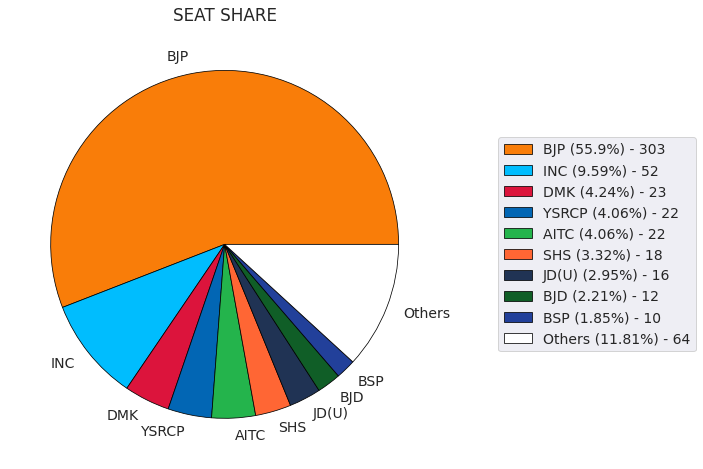

In [42]:
plt.figure(figsize = (10,8))
plt.title("SEAT SHARE")
# basic details

plt.pie(seat_distribution, labels = seat_distribution.index,
        colors = ['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634', 
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'],
        wedgeprops = {'edgecolor' : 'black', 'linewidth' : 0.75, 'antialiased' : True})
# pie chart created using the Data, labels, colors, and wedge border properties
# colors are customised according to each party's colors

seat_percent = round((seat_distribution/seat_distribution.sum())*100,2)
legend = seat_percent.index + " (" + seat_percent.values.astype(str) + "%) - " + seat_distribution.values.astype(str)
# the legend would the percentage seat share of each party (& others)

plt.legend(legend, loc = "right", bbox_to_anchor = (1.6,0.5));
# legend is placed outside the main chart accordingly

As we can see, the **BJP** was the single largest party with more than 50% of the seats in the House, with **INC** at a distant second.
<br> Other regional parties like **DMK**, **YSRCP**, **AITC**, **BJD** won some seats in their respective states, but no Alliance could pose as an alternative to **BJP**.

### Age
<br>
In this part we analyse the number of candidates, both contestants and winners, in each age group.

**We plot a `nested histogram` with each `bin` of size `5`**,
<br> And calculate the mean, maximum and minimum age of all candidates and winners.

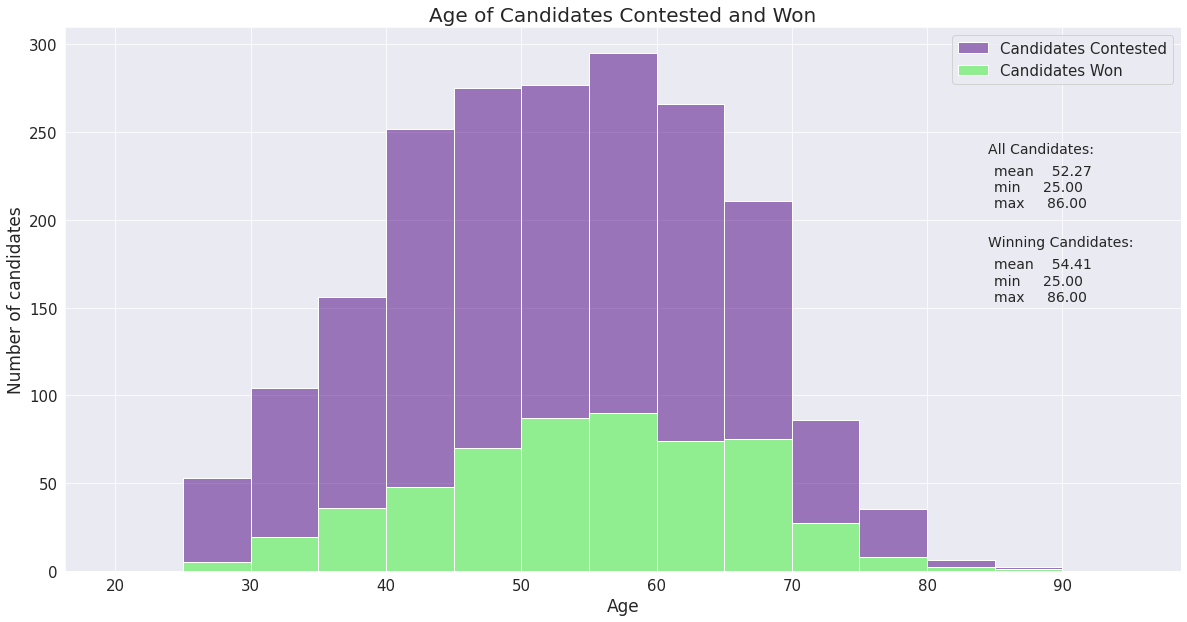

In [43]:
plt.figure(figsize = (20,10))
plt.title("Age of Candidates Contested and Won", fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of candidates", fontsize=17)
# put the basic labelling

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# axes ticks size

sns.histplot(data = candidates_personal_df, x = 'AGE', bins = np.arange(20,100,5), color = 'indigo', alpha = 0.5)
sns.histplot(data = winners_df, x = 'AGE', bins = np.arange(20,100,5), color = 'lightgreen', alpha = 1)
# two histograms plotted, Won over Contested to show the relative percentage

plt.legend(["Candidates Contested", "Candidates Won"], fontsize = 15)
# legend to the plot

plt.text(84.5, 238, "All Candidates:")
plt.figtext(0.77, 0.63, round(candidates_personal_df.describe().AGE[['mean', 'min', 'max']], 2).to_string())

plt.text(84.5,185, "Winning Candidates:")
plt.figtext(0.77, 0.5, round(winners_df.describe().AGE[['mean', 'min', 'max']], 2).to_string());
# basic stats printed

As we can see from the Nested Histogram, the age group `55-60` has the maximum number of Candidates, and Winners, followed closely by the age group `50-55`. <br> The average age of the house - `54 years` also lies in this range. A majority of the winners are between the ages `45-70`, which can be considered as the normal peak years of a Politician.

In [44]:
print("Youngest Member of the House:")
winners_df[(winners_df.AGE == 25)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Youngest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,Chandrani Murmu,BJD,Odisha,KEONJHAR


In [45]:
print("Oldest Member of the House:")
winners_df[(winners_df.AGE == 86)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


### Seat Category
<br> Here we calculate the ratio of seats which have a special reservation status for candidates of different backward classes.

In [46]:
seat_category = winners_df.CATEGORY.value_counts()
# winners_df has 1 constituency only 1 time, so analysing its CATEGORY column will give the correct result

In [47]:
pd.DataFrame(seat_category)

,CATEGORY
GENERAL,400
SC,86
ST,56


**Plot the distribution as a `Pie chart`:**

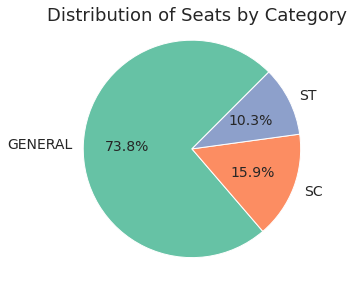

In [48]:
sns.set_palette(sns.color_palette('Set2'))
plt.figure(figsize=(8,5))
plt.title("Distribution of Seats by Category", size=18, x = 0.52, y =0.95)

plt.pie(seat_category, labels = seat_category.index, autopct = '%1.1f%%', startangle = 45);
# percentage of seats shown on the plot

As we can see, about `26%` seats in the Lok Sabha are reserved for SC and ST candidates, which is appropriate as they comprise about 25% of the population (as per the 2011 Census).

### Gender
<br> In this section we see the gender diversity of the contesting candidates, as well as the winning Members of Parliament.

**Plot the data as a horizontal bar chart.**

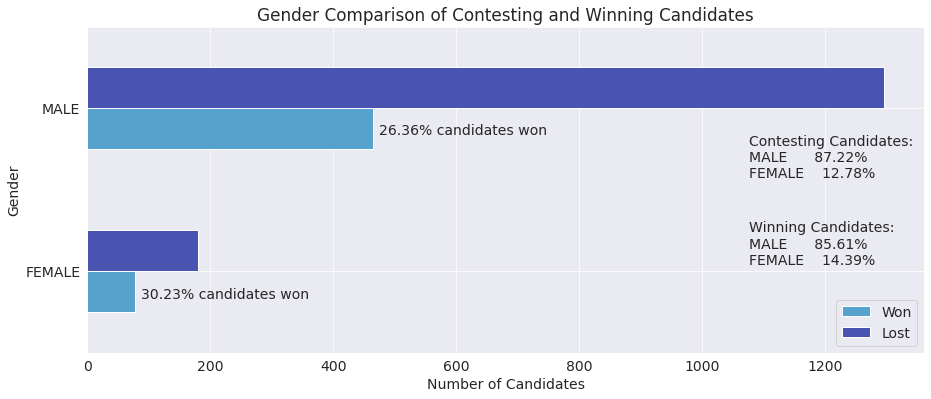

In [49]:
gender_group = candidates_personal_df.groupby(["GENDER", "WINNER"]).size()
gender_group = gender_group.unstack()
gender_group = gender_group[[1,0]]
# a2a from stack overflow

# gender with winning condition is extracted as a dataframe

sns.set_palette(sns.color_palette("icefire"))
# color palette set
gender_group.plot(kind = 'barh', figsize = (15,6), title = "Gender Comparison of Contesting and Winning Candidates")
# horizontal bar plot created with Pandas 

plt.legend(["Won", "Lost"])
plt.xlabel("Number of Candidates")
plt.ylabel("Gender")
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n" + 
            round((candidates_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

plt.figtext(0.738,0.33, "Winning Candidates:\n" + 
            round((winners_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

# Total candidates statistics (percentages) printed on the chart, with some applied String formatting to give the look

win_percent = round((winners_df.GENDER.value_counts()/candidates_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395, 0.63, str(round(win_percent.MALE,2)) + "% candidates won")
plt.figtext(0.175, 0.25, str(round(win_percent.FEMALE,2))+ "% candidates won");
# percentage of winning, gender-wise printed on the chart

In [50]:
print("No. of male MPs: ", winners_df.GENDER.value_counts()["MALE"])
print("No. of female MPs: ", winners_df.GENDER.value_counts()["FEMALE"])

No. of male MPs:  464
No. of female MPs:  78


As we can see, the House has `14.4%` Female members and `85.6%` Male members. 
<br> </br>
One surprising inference we can draw from the Analysis is that despite a higher percentage of Male Candidates contesting the elections than Female (`87.2%` vs `12.8%`), the percentage of Female Contestants who won was greater than that of Male Contestants (`30.2%` vs `26.4%`).
<br> ***This means, a Female Candidate had a greater chance of winning the election than a Male Candidate.***

### Educational Qualifications
<br> Here we analyse the educational qualifications of all the Winning Candidates.

In [51]:
winners_df["EDUCATION"].unique()

array(['Graduate\nProfessional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Others', '5th Pass',
       'Illiterate', 'Literate'], dtype=object)

In [52]:
education = winners_df.EDUCATION.value_counts()
education = education.reindex(["Illiterate", "Literate", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate", 
                               "Graduate\nProfessional","Post Graduate", "Doctorate", "Others"])
# arrange the Series in a systematic order

In [53]:
education

Illiterate                  1
Literate                    1
5th Pass                    4
8th Pass                   12
10th Pass                  45
12th Pass                  69
Graduate                  133
Graduate\nProfessional    101
Post Graduate             135
Doctorate                  24
Others                     17
Name: EDUCATION, dtype: int64

**Plot the data as a Bar Chart.**

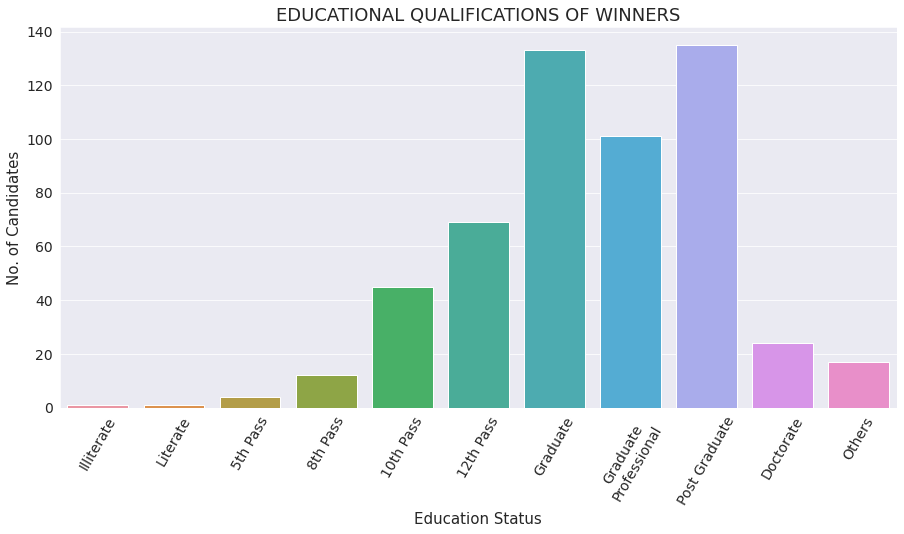

In [54]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 60);
# plot detailing

plt.xlabel("Education Status", fontsize = 15)
plt.ylabel("No. of Candidates", fontsize = 15)
plt.title("EDUCATIONAL QUALIFICATIONS OF WINNERS",fontsize = 18)
# labels and title

sns.barplot(x = education.index, y = education.values);
# plotting the barplot

We see, contrary to popular belief, most MPs are well educated and have at least a `Graduate` degree.
<br> There are less than 150 MPs who are `12th Pass` or below.

**Here we selected some specific columns of the DataFrames and performed Analysis and Visualization on those data. Now we shall move onto more complex Analysis and answering specific Questions.**

Now we shall pose some general Election related questions, and find the answers to those using Data Analysis, and Visualize them wherever possible.

We first create a new DataFrame `votes_df` with the sum of `TOTAL VOTES` column of the `candidates_df` DataFrame and the sum of `TOTAL ELECTORS` column of the `winners_df` DataFrame, grouping them by the `STATE` and `CONSTITUENCY` columns and append the `VOTER TURNOUT` in each constituency, as a column, to the end of the DataFrame.

In [55]:
total_voters = candidates_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors = winners_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df = total_voters.join(total_electors)
votes_df["VOTER TURNOUT"] = round(votes_df["TOTAL VOTES"]/votes_df["TOTAL ELECTORS"]*100,2)

First we analyse the data to answer the second part of the question, i.e., **Which Constituencies had the highest and the lowest Voter Turnout?**

In [56]:
votes_df = votes_df.rename(index = {"Andaman & Nicobar Islands": "Andaman &\nNicobar Islands"})
# this is done purely for visualization purposes
const_turnout = votes_df.sort_values(by = ["VOTER TURNOUT"], ascending = False)
# Voter Turnout of all constituencies

high_consts = const_turnout.head(10)
low_consts = const_turnout.tail(10)
# getting the highest and the lowest Voter Outcome Constituencies

In [57]:
# Just for aesthetics

xh = high_consts.index.get_level_values(1) + "\n(" + high_consts.index.get_level_values(0) + ")"
xl = low_consts.index.get_level_values(1) + "\n(" + low_consts.index.get_level_values(0) + ")"

# the xticks are re-written accordingly to show the desired result

We now have the required answer for Constituencies. 
<br>Now we analyse the data to answer the first part of the question, i.e., **Which States/UTs had the highest and the lowest Voter Turnout?**

In [58]:
# getting the state-wise data now
states_df = votes_df.groupby("STATE").sum().drop(["VOTER TURNOUT"], axis = 1)
states_df["VOTER TURNOUT"] = round(states_df["TOTAL VOTES"]/states_df["TOTAL ELECTORS"]*100,2)
# necessary arithmetic to calculate the required Voter Turnout of all States

In [59]:
states_turnout = states_df.sort_values(by = "VOTER TURNOUT", ascending = False)
high_stat = states_turnout.head(10)
low_stat = states_turnout.tail(10)
# getting the highest and lowest Voter Outcome States

**Plot the data to show the trends in Voter Turnout for the top 10 States/UTs and Constituencies.**
<br>Here we plot 4 `Line Charts` in a Multiplot to describe the trends and answer the posed question.

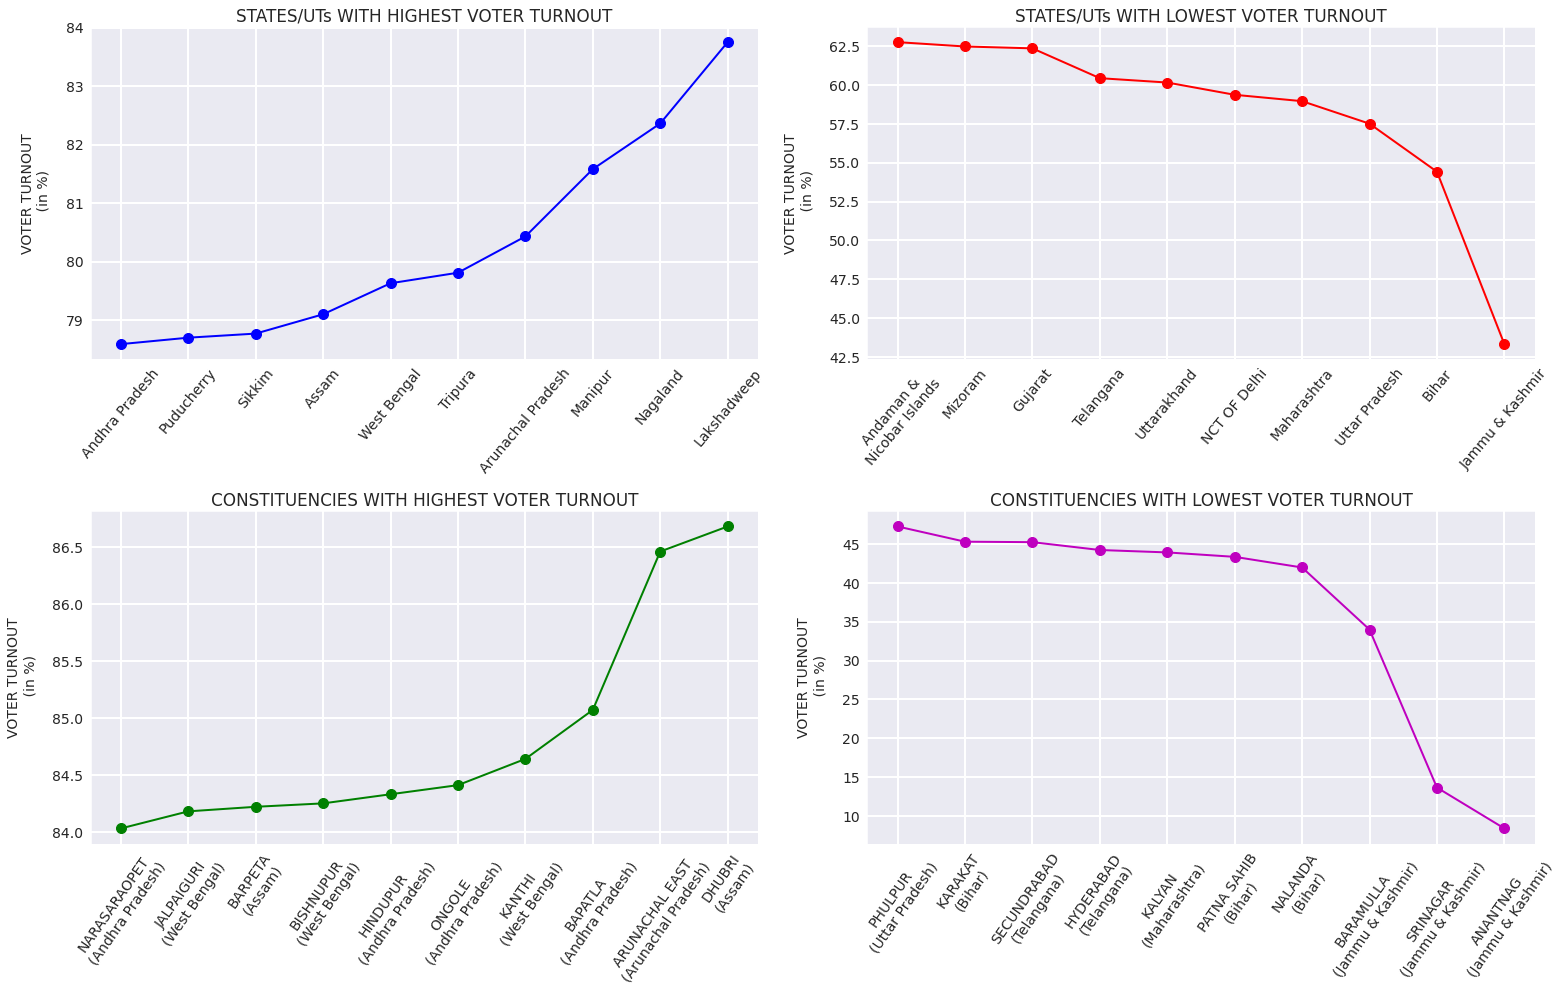

In [60]:
fig, axes = plt.subplots(2,2, figsize = (22,14))
# plot will be a subplot of 4 plots
# First row will be of States, second row of Constituencies

# Highest State Voter Outcome Plot
axes[0][0].tick_params(axis = 'x', labelrotation = 50)
axes[0][0].plot(high_stat.index[::-1], high_stat["VOTER TURNOUT"][::-1], 'b-o', linewidth = 2,
         markersize = 10)
axes[0][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][0].set_title("STATES/UTs WITH HIGHEST VOTER TURNOUT")
axes[0][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest State Voter Outcome Plot
axes[0][1].tick_params(axis = 'x', labelrotation = 50)
axes[0][1].plot(low_stat.index, low_stat["VOTER TURNOUT"], 'r-o', linewidth = 2,
         markersize = 10)
axes[0][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][1].set_title("STATES/UTs WITH LOWEST VOTER TURNOUT")
axes[0][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

# Now the Constituencies

# Highest Consituency Voter Outcome Plot
axes[1][0].tick_params(axis = 'x', labelrotation = 55)
axes[1][0].plot(xh[::-1], high_consts["VOTER TURNOUT"][::-1], 'g-o', linewidth = 2,
         markersize = 10)
axes[1][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][0].set_title("CONSTITUENCIES WITH HIGHEST VOTER TURNOUT")
axes[1][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest Constituency Voter Outcome Plot
axes[1][1].tick_params(axis = 'x', labelrotation = 55)
axes[1][1].plot(xl, low_consts["VOTER TURNOUT"], 'm-o', linewidth = 2,
         markersize = 10)
axes[1][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][1].set_title("CONSTITUENCIES WITH LOWEST VOTER TURNOUT")
axes[1][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

fig.tight_layout();
# to prevent overlapping of plots

In [61]:
nat_average = round(states_turnout.sum()["TOTAL VOTES"]/states_turnout.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")

National Voter Turnout: 65.26%


## Inferences and Conclusion

To sum up the entire analysis in 1 statement: 
<br></br>**The incumbent BJP Government led by Prime Minister Narendra Modi secured an overwhelming victory over its opponents and secured a second term in the office, winning 303 seats out of 542.**
<br></br>
* The average age of the House is *54 years* with maximum MPs between the ages 45-70.
* Nearly *26%* of the seats in the House are reserved for SC/ST candidates.
* More than *14%* of the House consists of Women MPs.
* Female candidates had a much higher winning percentage *(30.23%)* as compared to Male candidates *(26.36%)*.
* Less than *150 MPs* are 12th Pass or below.
* The National average Voter Turnout was *65.26%*.
* Many North Eastern states registered some of the highest voter turnouts in the country.
* Important states like Bihar, Uttar Pradesh, and Maharashtra had the lowest voter turnouts in the country.
* Lakshadweep had the best voter turnout of nearly *84%*.
* Jammu and Kashmir had the worst voter turnout of about *42.6%*.
* More than *43%* of the elected MPs have a self-declared criminal record, with the *BJP* and the *INC* combined having more than *62%* of those.
* An astonishing *88%* of the elected MPs have Assets worth more than 1 crore while nearly *85%* of the MPs have a Net Worth higher than 1 crore.
* **One of the key takeaways from the EDA is that wherever it was a direct contest between *BJP* and *INC*, people favored the  *BJP* candidate more.**
* **C.R. Patil** registered a record margin of victory with over *6.89 lakhs votes* in Navsari, Gujarat.
* B.P. Saroj of BJP won the closest victory over Tribhuvan Ram of BSP with just *181 votes* in Machhlishahr, Uttar Pradesh.
* The **BJP** dominated the Opposition in all parts of the country, sweeping **North India**, **Central India**, **West India** and **North-East India** while making substantial gains in **East India** and emerging as the largest party in **South India**.
* **INC**, the principal opposition party, on the other hand, had a very sorrowful outing in the Polls. It failed to have any significant impact anywhere in the country, except in the **South Indian** states of Kerala and Tamil Nadu, and some seats in *Punjab* and *Assam*.
<br></br>
To conclude, the newly elected 17th Lok Sabha will be led by Prime Minister Narendra Modi and his party the Bharatiya Janata Party (BJP), with Indian National Congress (INC) being the second largest party in the House.